<h2><b> Plot secao vertical de temperatura <h2></b>

<p style="color:lighblue"> Resolução do exercicio plot de seção vertical de temperatura. Aqui plotaremos os dados de temperatura na região do Atlântico Sul obtidos do modelo global Mercator, esse dado possui resolução espacial de 1/12° 
</p>

<ul>
<p style="font-size:16px; color:black"> Tópicos de hoje</p>

<li> Como abrir um arquivo netcdf4 </li>
<li> Como manipular dados multidimensionais</li>
<li> Como plotar uma seção vertical</li>

</ul>
    


<h3 style='color:black'>Vamos importar as libs</h3>

<p style= "font-size:20px; color:orangered"> Se você estiver no google colab, por favor descomente e rode as 2 linhas logo abaixo, depois reinicie seu colab.</p>

In [ ]:
#!pip install netcdf4

In [ ]:
#pip install cmocean

In [1]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt 
import numpy as np 
import cmocean
%matplotlib inline

#### defininção de funções

In [2]:
def lon360to180(lon):
    """
    Converts longitude values in the range [0,360]
    to longitude values in the range [-180,+180].
    """
    lon = np.asanyarray(lon)
    return ((lon + 180.) % 360.) - 180.

In [3]:
def hours2dates(reference_date, values):
    """"
    Converts hours values in datetime based in a
    specific date.  The reference date must be in the
    format Day/Month/Year Hour:Minutes.
    """
    import datetime as dt
    date_python = dt.datetime.strptime(reference_date,
                                  '%d/%m/%Y %H:%M')
    Time = [date_python + dt.timedelta(hours = x) for x in values]
    return Time

#### Lendo os dados do arquivo NetCDF

In [5]:
file = '/home/gustavo/Documentos/python_aulas/dados/DadosMercator/dadosMercator.nc'
dado = Dataset(file)

FileNotFoundError: [Errno 2] No such file or directory: b'/home/gustavo/Documentos/python_aulas/dados/DadosMercator/dadosMercator.nc'

In [6]:
dado.variables

NameError: name 'dado' is not defined

Dentro do arquivo temos as lats, lons e temperatura potencial

In [7]:
lat = dado['latitude'][:]
lon = lon360to180(dado['longitude'][:])
time = dado['time'][:]

A partir da latitude e longitude, teremos que encontrar a latitude que se aproxima mais da região de interesse, que no caso é por volta de 4ºS. Para isso utilizaremos essa função que vamos definir em seguida.

In [9]:
def neighbor(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [10]:
neighbor_lon = neighbor(lon,-37) # Encontrando o valor mais proximo a 4º
#lim_lon = np.where(lon[lon<-34])

Agora podemos salvar nossas variaveis já utilizando a indexação a partindo do valor de latitude encontrado com a função "near".

In [12]:
temperatura = dado['thetao'][:,:,:,neighbor_lon].squeeze()
prof = dado['depth'][:]
lon = lon[lon==neighbor_lon]

Vamos fazer um teste para saber se estamos no cmainho certo.

In [13]:
X,Y = np.meshgrid(lat,lon)

Text(0.5, 0, 'Longitude')

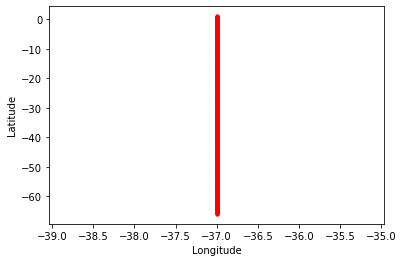

In [16]:
plt.plot(Y,X,'r.');
plt.ylabel('Latitude')
plt.xlabel('Longitude')

Tudo indica que conseguimos selecionar a linha proxima a banda de -8º de latitude. Podemos continuar.

Aqui escolhemos se vamos criar o grid a partir da longitude ou da distancia calculada.

In [17]:
Y, Z = np.meshgrid(lat,-prof)

In [18]:
temperatura.shape #matriz de temperatura 3 tempos, 39 prof e 1237 longitudes

(3, 39, 805)

In [19]:
Y.shape, Z.shape #matriz lon e prof com 39 x 1237

((39, 805), (39, 805))

#### plot do dado em um loop

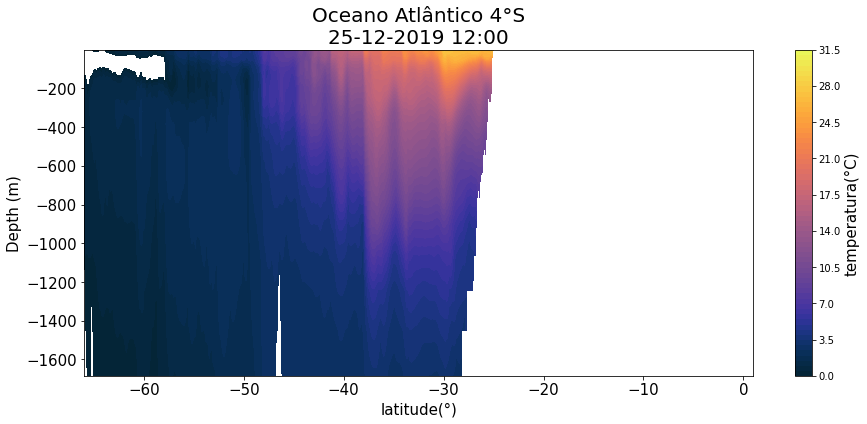

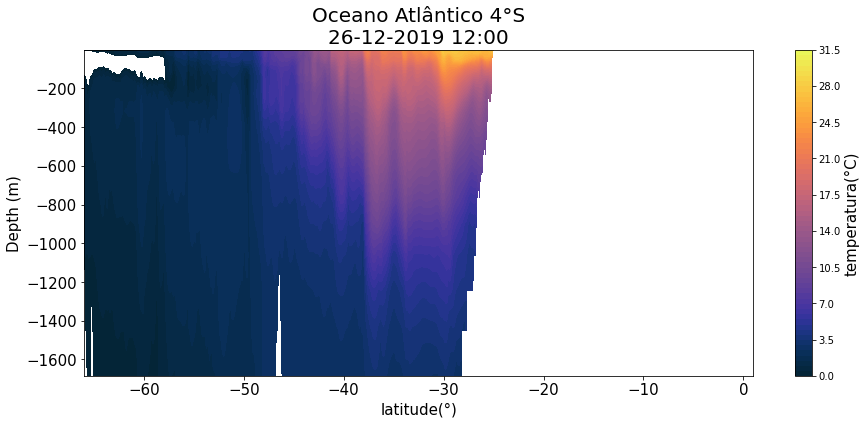

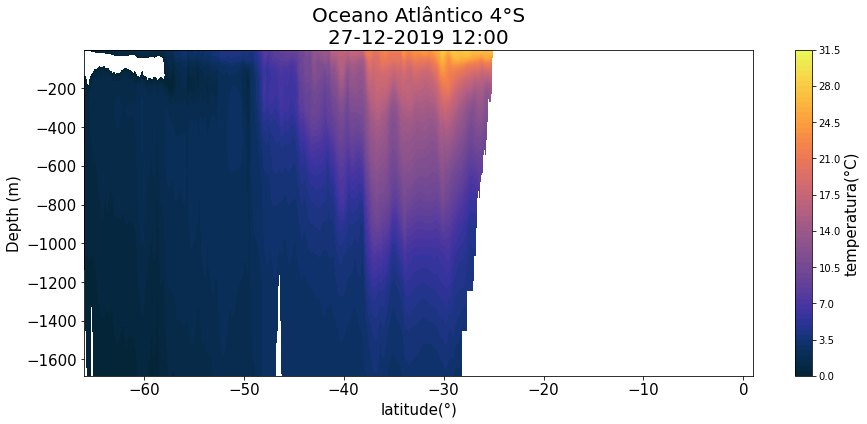

In [20]:
tempo = hours2dates('01/01/1950 00:00',time)


for ii in range(0,len(time),1):
    
    date_str = tempo[ii].strftime('%d-%m-%Y %H:%M')
    colorScale = np.arange(0,32,.5)
    fig, ax = plt.subplots(1,figsize=(15,6));
    plt.xlim([-65, 0])
    cmap = ax.contourf(Y,Z,temperatura[ii,:,:],levels=colorScale,
                       cmap = cmocean.cm.thermal);
    cbar = plt.colorbar(cmap);
    cbar.set_label('temperatura(°C)',fontsize=15);
    #plt.xticks(np.arange(min(lat), max(lat),5))
    ax.tick_params(axis='both', which='major', labelsize=15);
    ax.set_ylabel('Depth (m)',fontsize=15);
    ax.set_xlabel('latitude(°)',fontsize=15);
    ax.set_title('Oceano Atlântico 4°S\n'+date_str,fontsize=20);
